In [1]:
import numpy as np
import matplotlib.pyplot as plt
import trackpy as tp
import numpy.linalg as la

/mnt/c/Users/Jeroe/Documents/TU Delft/BEP Python code/eftem/lib/python3.8/site-packages/pims/image_reader.py:26: RuntimeWarning: PIMS image_reader.py could not find scikit-image. Falling back to matplotlib's imread(), which uses floats instead of integers. This may break your scripts. 
(To ignore this warning, include the line "warnings.simplefilter("ignore", RuntimeWarning)" in your script.)
  warnings.warn(RuntimeWarning(ski_preferred))


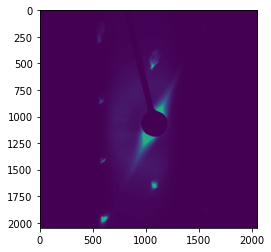

In [2]:
eftem_stack = np.load("data/data_cube.npy")
plt.imshow(eftem_stack[0,:,:])

In [3]:
centres = tp.batch(eftem_stack, 51, processes='auto')

Frame 70: 39 features


In [4]:
centres.shape

(1017, 9)

In [5]:
print(centres)

                y            x          mass       size       ecc  \
0      165.453135   596.813764  5.354537e+06  14.770873  0.581565   
1      287.379287   556.510408  2.563442e+07  12.846972  0.357860   
2      403.941307  1073.700991  1.479195e+07  15.926987  0.309743   
3      528.927973  1056.136407  1.595974e+08  13.466644  0.412041   
4      594.269885   918.994723  5.595092e+06  14.771962  0.482322   
...           ...          ...           ...        ...       ...   
1012  1430.268078   556.803257  2.138994e+05  12.005740  0.168851   
1013  1669.257539  1041.317853  1.155196e+05  12.470085  0.111205   
1014  1742.809524    86.552561  7.754726e+04  10.145615  0.137077   
1015  1899.180583  1513.489952  2.461585e+05  13.219703  0.153678   
1016  1981.227844   568.306213  1.419819e+06  13.503686  0.056741   

             signal      raw_mass        ep  frame  
0      16401.481630  2.862076e+07  0.144046      0  
1      67792.790737  6.796844e+07  0.055601      0  
2      36083

In [6]:
frame = centres['frame']
X = centres['x']
Y = centres['y']

print(frame)


0        0
1        0
2        0
3        0
4        0
        ..
1012    70
1013    70
1014    70
1015    70
1016    70
Name: frame, Length: 1017, dtype: int64


In [10]:
counts = np.array([], dtype='int16')

inc = 1
for i in range(0,len(frame)-1):
    if frame[i+1] != frame[i]:
        counts = np.append(counts, inc)
        inc = 0
    else:
        inc += 1


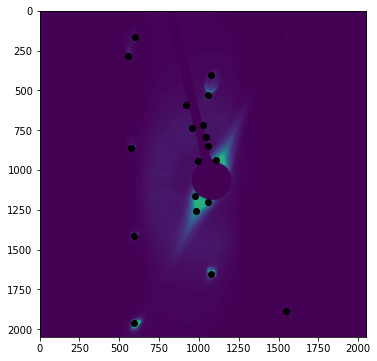

In [14]:


plt.imshow(eftem_stack[0,:,:])
plt.scatter(X[0:counts[0]], Y[0:counts[0]], marker='o', color='black')
plt.gcf().set_size_inches((6,6))

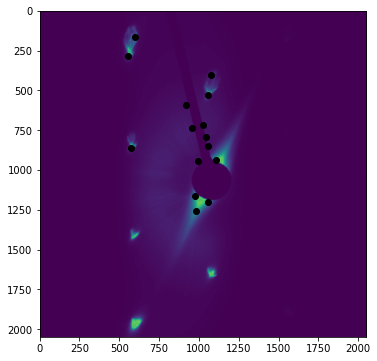

In [15]:

plt.imshow(eftem_stack[1,:,:])
plt.scatter(X[0:counts[1]], Y[0:counts[1]], marker='o', color='black')
plt.gcf().set_size_inches((6,6))

15

In [22]:
from scipy.signal import convolve2d as cv2

In [17]:
x = np.arange(11) - 5
X, Y = np.meshgrid(x,x)
Dot =  np.sqrt( X**2 + Y**2 ) < 6 

x_im = np.arange(200)
X_im , Y_im = np.meshgrid(x_im, x_im)

Input = 0*X_im + 0*Y_im

for i in range(1,10):
    for j in range(1,10):
        Input[i*20 - 6: i*20 + 5, j*20 - 6: j*20 + 5 ] +=Dot

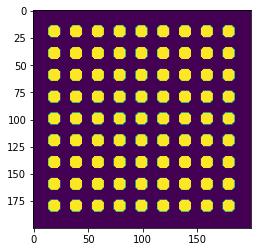

In [18]:
plt.imshow(Input)

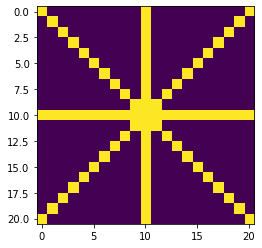

In [29]:
mask = np.eye(21) + np.fliplr( np.eye(21) )
mask[10,:] = 1
mask[:,10] = 1
plt.imshow(mask)

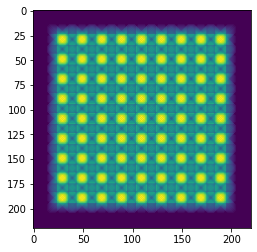

In [30]:
output = cv2(Input, mask)
plt.imshow(output)

In [33]:
np.argmax(output)

5969